In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_curve, auc, confusion_matrix

# Train KNN Regressor model
knn = KNeighborsRegressor(n_neighbors=5)  # Adjust the number of neighbors if needed
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [17]:
#predict regression results
y_pred=knn.predict(x_test)


In [18]:
# Evaluate regression model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2 Score:", r2)


Mean Squared Error (MSE): 2.2076845759688237
Mean Absolute Error (MAE): 1.1187207903328242
R2 Score: 0.7734489378232479


In [21]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Define threshold for binary classification (example: median of y_test)
threshold = y_test.mean()

# Convert regression predictions to binary classification for ROC and evaluation
y_test_binary = (y_test >= threshold).astype(int)
y_pred_binary = (y_pred >= threshold).astype(int)

In [22]:
# Confusion Matrix for binary classification
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[2830  794]
 [ 453 2440]]


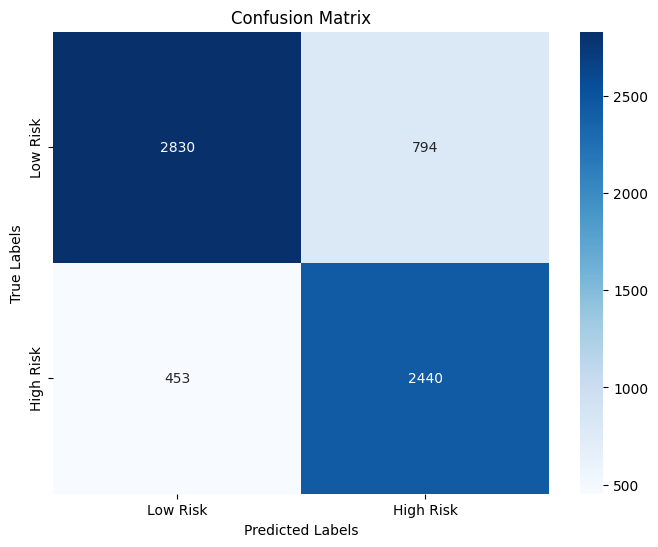

In [23]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Low Risk", "High Risk"], yticklabels=["Low Risk", "High Risk"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [24]:
# ROC Curve and AUC for binary classification
fpr, tpr, _ = roc_curve(y_test_binary, y_pred)
roc_auc = auc(fpr, tpr)

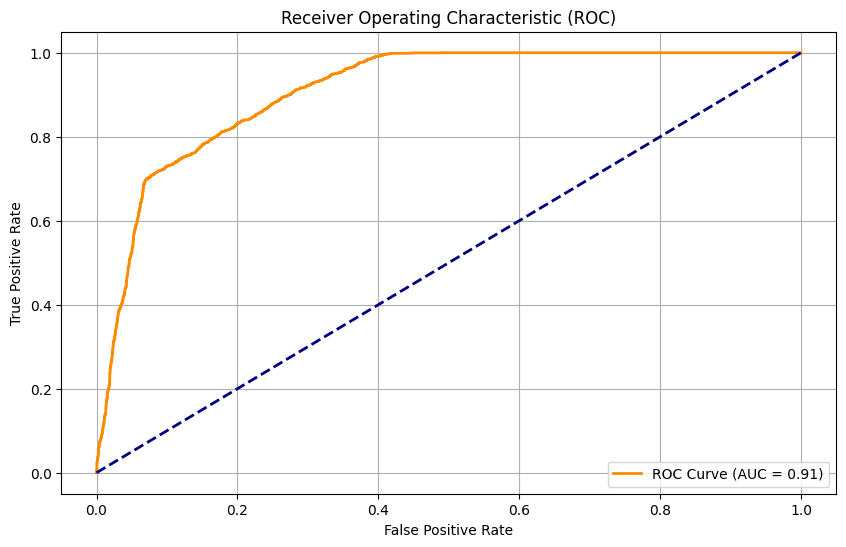

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()